Question 2: What are the distinct customer segments based on shopping behavior, and how can they be targeted effectively?

Objective: Segment customers using KMeans Clustering to identify distinct behaviors.

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
# STEP 1: Feature Engineering
# Load orders dataset
# Load datasets
orders = pd.read_csv(r'D:\Portfolio\Projects\Instacart\data\orders.csv')
order_products_prior = pd.read_csv(r'D:\Portfolio\Projects\Instacart\data\order_products__prior.csv')
products = pd.read_csv(r'D:\Portfolio\Projects\Instacart\data\products.csv')

# Merge datasets to create `order_prior`
order_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_prior = pd.merge(order_prior, orders, on='order_id', how='left')

In [12]:
# Calculate user-level metrics
user_metrics = orders.groupby('user_id').agg({
    'order_number': 'max',  # Total number of orders
    'days_since_prior_order': 'mean'  # Average days between orders
}).rename(columns={
    'order_number': 'total_orders',
    'days_since_prior_order': 'avg_days_between_orders'
})

In [13]:
# Add average basket size per user
basket_size = order_prior.groupby('user_id')['product_id'].count().rename('avg_basket_size')
user_metrics = user_metrics.join(basket_size)

In [14]:
# STEP 2: Data Normalization
# Standardize features for clustering
scaler = StandardScaler()
user_scaled = scaler.fit_transform(user_metrics)

In [15]:
# STEP 3: Apply KMeans Clustering
# Cluster customers into 4 segments
kmeans = KMeans(n_clusters=4, random_state=42)
user_metrics['cluster'] = kmeans.fit_predict(user_scaled)

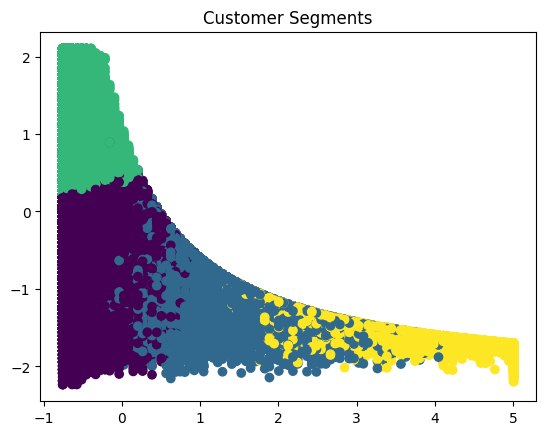

In [16]:
# STEP 4: Visualize Clusters
plt.scatter(user_scaled[:, 0], user_scaled[:, 1], c=user_metrics['cluster'])
plt.title('Customer Segments')
plt.show()